In [1]:
import napari
from src.napari_sim_processor._sim_widget import reshape, SimAnalysis

pytorch found
fftw found using 8 threads


In [2]:
from IPython import get_ipython
get_ipython().config

{'IPKernelApp': {'connection_file': '/Users/maan/Library/Jupyter/runtime/kernel-7ee11d46-c87d-4d62-a18e-ff3e7be89bda.json'}}

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Run the napari plugin and process a chosen dataset.  The calculations below are for a 140x128x128 dataset with 500 points.

In [4]:
viewer = napari.Viewer()
widget = SimAnalysis(viewer)
my_reshape_widget = reshape()
w1 = viewer.window.add_dock_widget(my_reshape_widget, name='Reshape stack', add_vertical_stretch=True)
w2 = viewer.window.add_dock_widget(widget,
                              name='Sim analyzer @Polimi',
                              add_vertical_stretch=True)
viewer.window._qt_window.tabifyDockWidget(w1, w2)
napari.run()

/usr/local/lib/python3.9/site-packages/superqt/qtcompat/__init__.py:7: UserWarning: The superqt.qtcompat module is deprecated as of v0.3.0. Please import from `qtpy` instead.
  warnings.warn(


# Post-processing the plugin processed data

If you perform a numpy batch process on the data-set it will save a copy of one of its intermediate images `img2` that is the internal calculated image after shifting and scaling bands to their new positions

In [97]:
img2 = widget.h.img2
widget.imageRaw_name

'3d-480z'

but actually the precursor to this is just an oversampled version of the input data that we will call `img1` here, and is simply calculated by dividing `img2` by the reconstruction factors

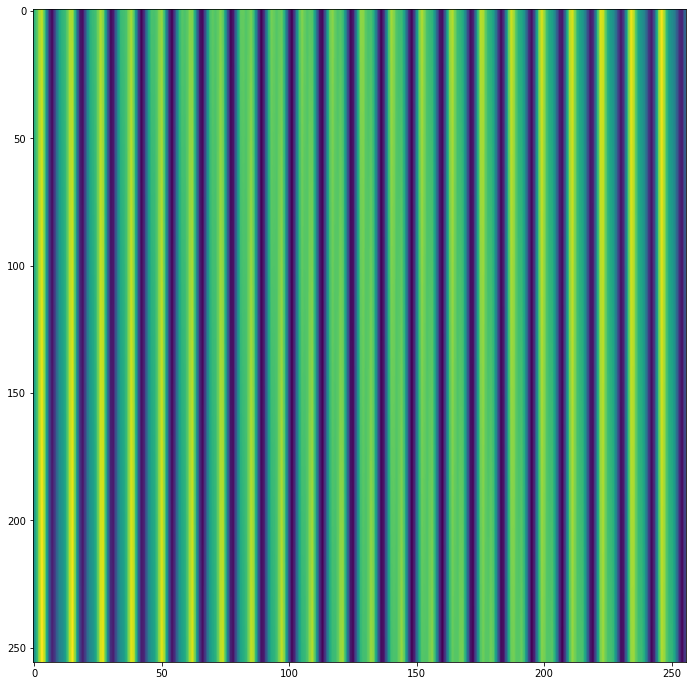

In [86]:
plt.figure(figsize=(12,12))
plt.imshow(widget.h._reconfactor[1, :, :])

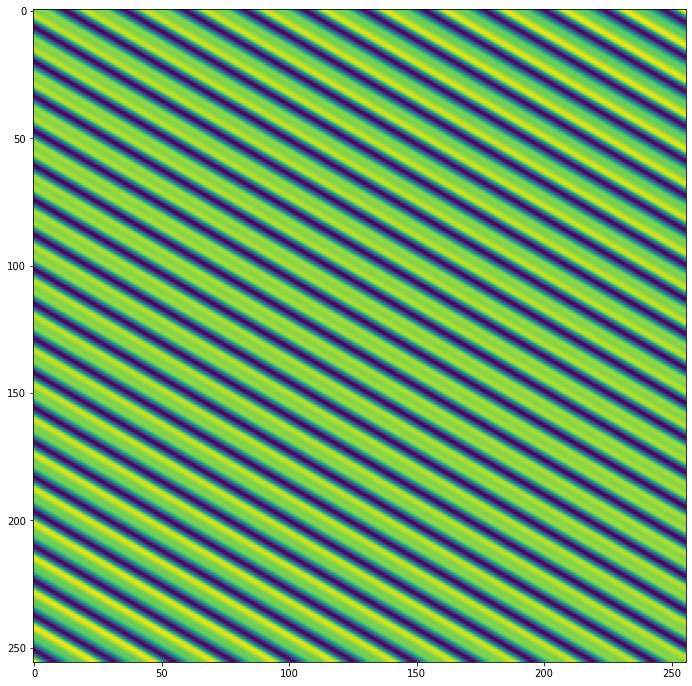

In [87]:
plt.figure(figsize=(12,12))
plt.imshow(widget.h._reconfactor[5, : :])

In [88]:
h = widget.h

In [89]:
h.ampl

array([[0.03585734],
       [0.08375054],
       [0.03798389],
       [0.08347631],
       [0.03827007],
       [0.08400645]], dtype=float32)

In [90]:
stack = widget.get_current_ap_stack()
sa,sp,sy,sx = stack.shape
img = stack.reshape(sa*sp, sy, sx) 
phi = np.zeros((h._nbands, h._nsteps), dtype=np.single)
for i in range(h._nbands):
    phi[i, :], _ = h.find_phase(h.kx[i], h.ky[i], img)


In [91]:
np.unwrap(phi)
np.unwrap(phi[0,:] + phi[1, :] - phi[2, :])

array([ 5.3267183 ,  3.3006258 ,  4.241057  ,  7.2715006 ,  7.85792   ,
        6.0271845 ,  4.9182158 ,  3.9896734 ,  1.6359483 ,  1.881314  ,
        3.0100455 ,  0.682415  , -0.01443115, -2.972938  , -2.4991708 ],
      dtype=float32)

In [92]:
phi.T - phi[:,0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.3195307 , -3.070292  ,  0.27533126, -0.8646934 , -4.364483  ,
         1.7448132 ],
       [ 1.9926338 , -0.4623804 ,  2.6159148 , -2.4253972 , -3.4196358 ,
         1.9836164 ],
       [-2.1632364 , -4.9368286 ,  3.5215235 , -3.7588866 , -2.41838   ,
        -1.6100452 ],
       [-1.4980476 , -2.827412  , -0.57347655, -4.2530475 , -0.21372926,
        -1.4135828 ],
       [ 2.9953835 ,  0.06161189,  2.356528  , -4.8227606 , -4.4384804 ,
         2.7068882 ],
       [-3.0757418 ,  0.10208654,  3.7180324 , -2.417257  , -3.5402956 ,
         2.024151  ],
       [-0.1883128 , -2.7862875 ,  4.64563   , -0.80190516, -3.086738  ,
         0.8238737 ],
       [-0.23933107, -3.3251762 ,  0.12626171, -4.8126726 , -0.8667411 ,
        -0.78709763],
       [ 1.3438585 , -3.7775202 ,  1.0117416 , -2.969939  , -0.07348299,
        -1.4638528 ],
       [ 1.3908694 , -4.547838  ,  5.4428883 , -3.

In [93]:
np.angle(h._get_band_construction_matrix(phi))

array([[ 0.        ,  0.11529775,  2.8733509 , -0.        ,  3.1415925 ,
         3.1415925 ,  0.        , -0.11529775, -2.8733509 ,  3.1415925 ,
        -0.        , -0.        ,  0.        ],
       [ 0.        ,  1.4348285 , -0.19694103, -0.        ,  3.1415925 ,
        -0.        ,  0.        , -1.4348285 ,  0.19694103,  3.1415925 ,
        -0.        ,  3.1415925 ,  0.        ],
       [ 0.        ,  2.1079316 ,  2.4109704 ,  0.        ,  0.        ,
         0.        ,  3.1415925 , -2.1079316 , -2.4109704 ,  0.        ,
         0.        ,  0.        , -0.        ],
       [ 0.        , -2.0479386 , -2.063478  ,  0.        ,  0.        ,
         0.        , -0.        ,  2.0479386 ,  2.063478  ,  0.        ,
         0.        ,  0.        ,  3.1415925 ],
       [ 0.        , -1.3827498 ,  0.04593886, -0.        , -0.        ,
         3.1415925 , -0.        ,  1.3827498 , -0.04593886,  3.1415925 ,
         3.1415925 , -0.        ,  3.1415925 ],
       [ 0.        ,  3.141592

In [94]:
np.angle(h._M)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 8.3704216e-10, -1.2566370e+00, -2.5132742e+00,  2.5132742e+00,
         1.2566370e+00,  5.2586013e-01, -1.1685535e+00, -2.4416600e-01,
         3.1415925e+00,  1.1071488e+00,  3.1415925e+00,  1.5707964e+00,
        -6.2418811e-02,  7.8539819e-01,  2.6779451e+00],
       [ 3.5899711e-10, -2.5132742e+00,  1.2566371e+00, -1.2566371e+00,
         2.5132742e+00, -2.2541375e-01, -1.2729857e+00, -2.5619774e+00,
         1.1071488e+00,  7.8539819e-01,  2.6779451e+00,  2.0344439e+00,
         0.0000000e+00,  3.1415925e+00,  2.2455373e+00],
       [-2.8533728e+00,  1.5169644e+00, -1.8839760e+00, -2.7617986e+00,
        -2.3848662e+00,  4.6883391e-09, -1.2566370e+00, -2.5132742e+00,
         2.5132742e+00,  1.2566370e+0

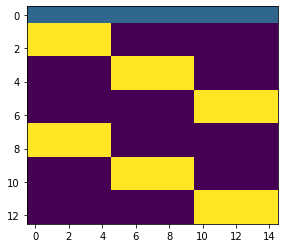

In [95]:
plt.imshow(np.abs(h._M))

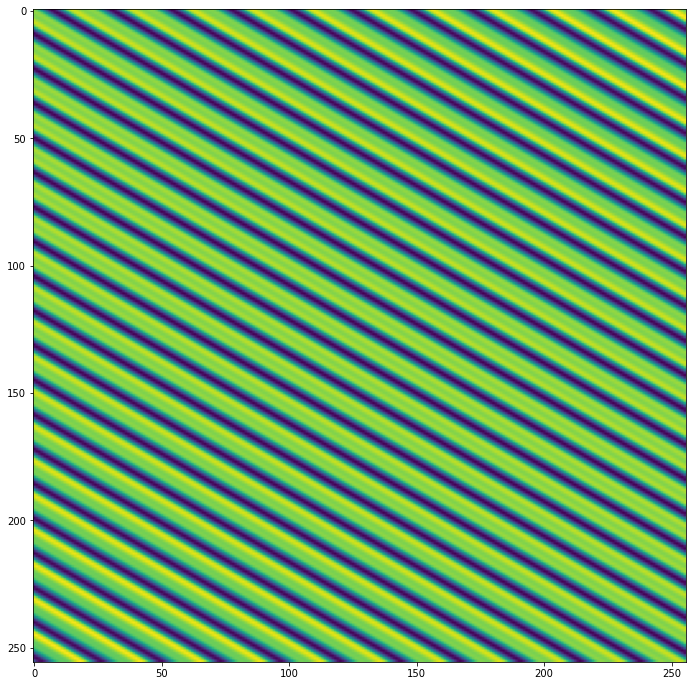

In [96]:
xx = np.arange(-h.Nx, h.Nx, dtype=np.single) * 1 * h._dx2
yy = np.arange(-h.Ny, h.Ny, dtype=np.single) * 1 * h._dy2
ph = np.single(2 * np.pi * h.NA / h.wavelength)
i=6

r1 = h._M[0, i].real + np.sum([np.outer(
                    np.exp(1j * (ph * h.ky[j] * yy + h.p[j])) * (h._M[j + 1, i] * 4 / h.ampl[j]),
                    np.exp(1j * ph * h.kx[j] * xx)).real for j in range(h._nbands)], 0)
plt.figure(figsize=(12,12))
plt.imshow(r1)

In [25]:
h.ky[5]+h.ky[3]-h.ky[1]

array([1.2019238e-07], dtype=float32)

In [23]:
# h.ky[0,0] += 0.014
# h.ky[1,0] = 1
# h.ky[2,0] = 2.1
h.ky

array([[-9.8308961e-10],
       [-9.8308961e-10],
       [ 8.2928574e-01],
       [ 1.6515585e+00],
       [-8.2928574e-01],
       [-1.6515584e+00]], dtype=float32)

In [98]:
img1 = np.zeros_like(img2)
for i in range(0, img1.shape[0], 15):
    img1[i:i+15, :, :] = img2[i:i+15, :, :] / widget.h._reconfactor

Here we display the summation of `img1` along the y-axis 

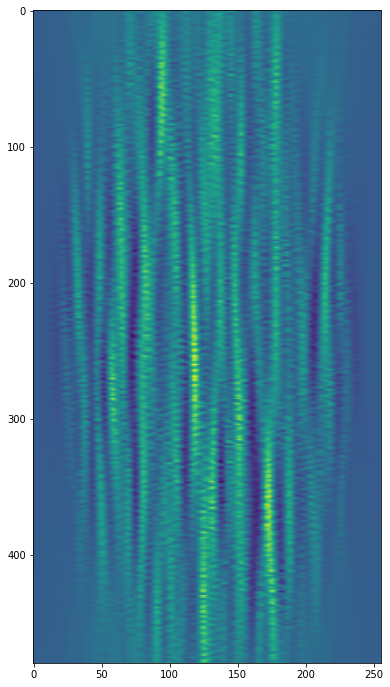

In [99]:
img1xz=np.sum(img1, 1)
plt.figure(figsize=(16,12))
plt.imshow(img1xz)

And calculate its Fourier transform to reveal lateral variation and the axial variation that is a combination of the slow drift in z and the 7 changing illumination patterns.

In [100]:
def log_p1(arr, offs=1000):
    return(np.log(arr + arr.max() / offs))

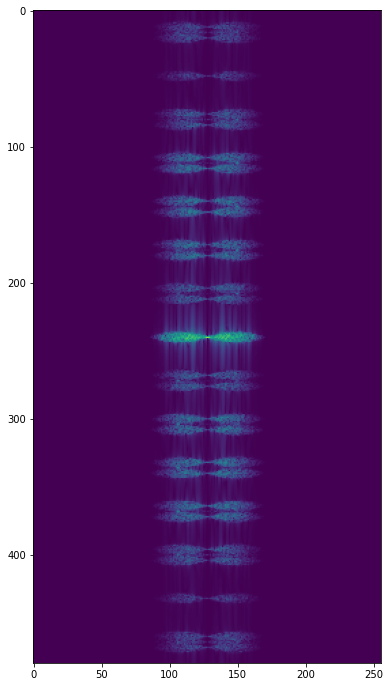

In [101]:
img1xzft = np.abs(np.fft.fftshift(np.fft.fft2(img1xz)))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(img1xzft))

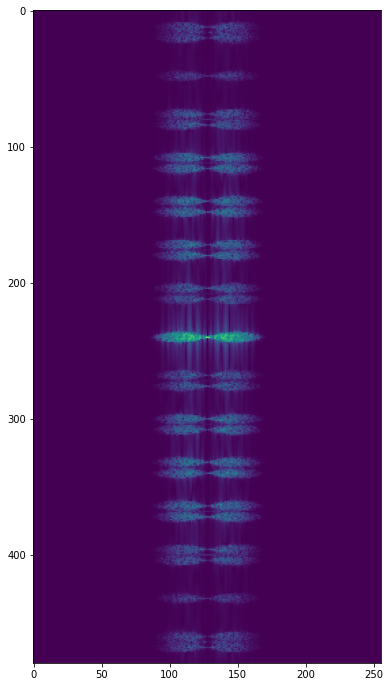

In [103]:
img1yzft = np.abs(np.fft.fftshift(np.fft.fft2(np.sum(img1, 2))))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(img1yzft))

Looking back at `img2` we can see that multiplying by the reconstruction factors has increased the information in the lateral direction (it has shifted the bands about, and has introduced significant structure in the z-direction. 

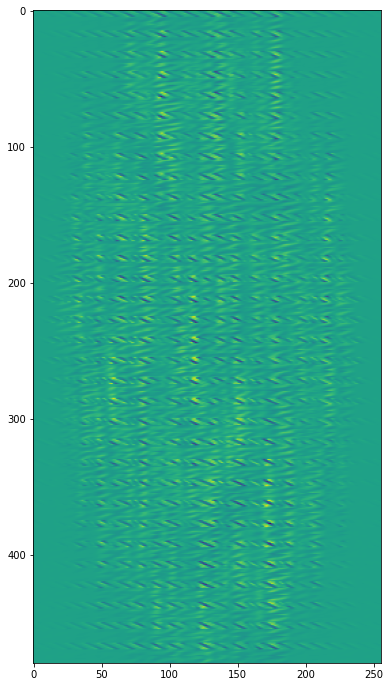

In [104]:
img2xz = np.sum(img2, 1)
plt.figure(figsize=(16,12))
plt.imshow(img2xz)#, vmin=img2xz.min()/4, vmax=img2xz.max()/4)

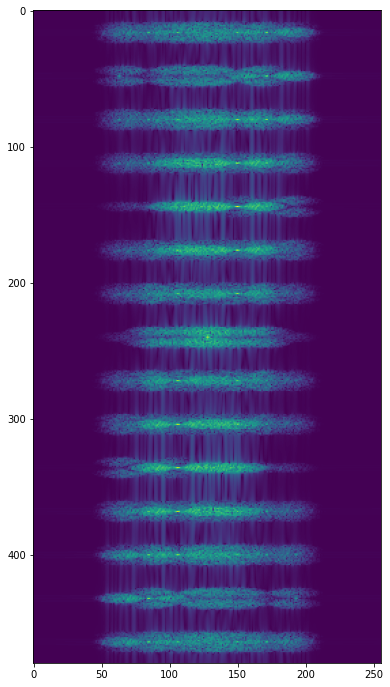

In [105]:
img2xzft = np.fft.fftshift(np.fft.fft2(img2xz))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(np.abs(img2xzft)))

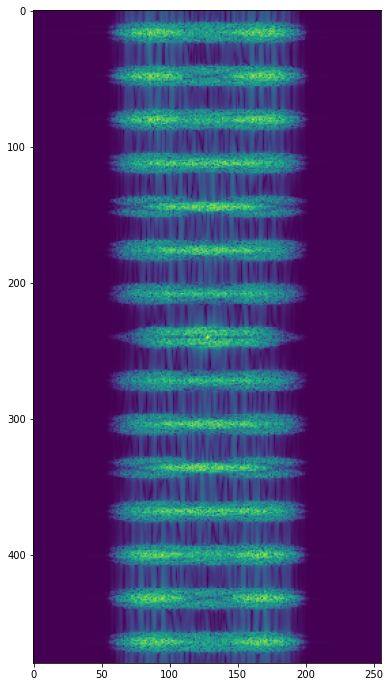

In [71]:
img2yzft = np.fft.fftshift(np.fft.fft2(np.sum(img2, 2)))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(np.abs(img2yzft)))

For rolling sim we take 7 images from `img2` at a time and add them up.  Note that we have a bit of an issue at the top/bottom of the stack as we run out of data.

In [106]:
r_sim = np.zeros_like(img2)
for i in range(3, r_sim.shape[0]-4):
    r_sim[i, :, :] = np.sum(img2[i-3:i+4, :, :], 0)

Again we can plot this as a summation in the y-direction and we still see high frequency artefacts.

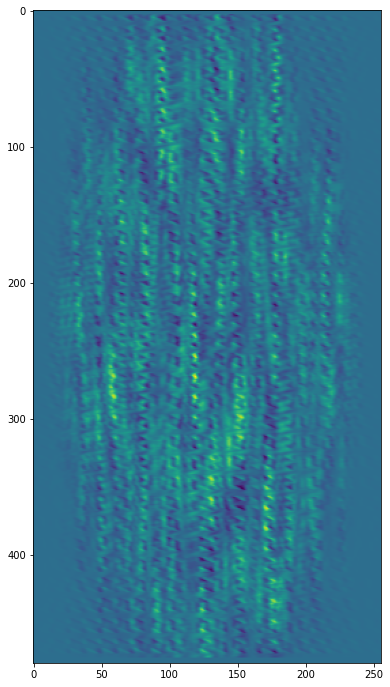

In [107]:
r_simxz = np.sum(r_sim, 1)
plt.figure(figsize=(16,12))
plt.imshow(r_simxz)

And show its Fourier spectrum in the xz plane.  Note here that the higher frequency components in `img2` have been suppressed (but not eliminated) by the filtering action of the summation in groups of 7. This will be equivalent to multimlyig by a `sinc` function in the z-direction which is revealed by the zeros in the Fourier spectrum 

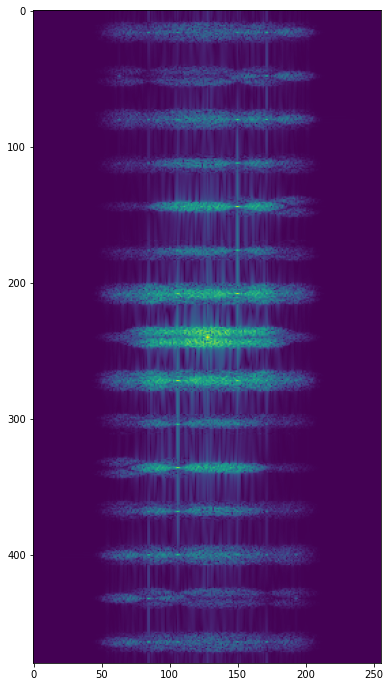

In [108]:
r_simxzft = np.abs(np.fft.fftshift(np.fft.fft2(r_simxz)))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(r_simxzft))

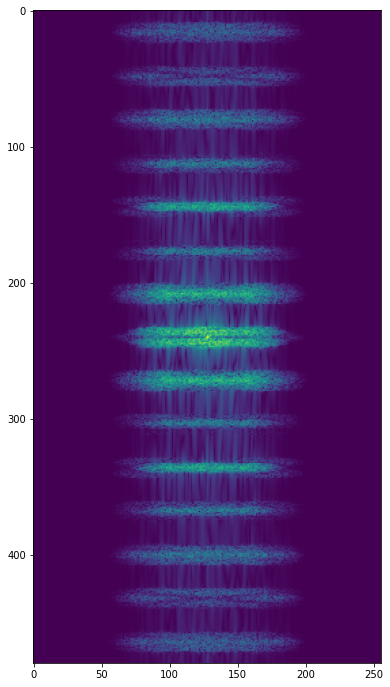

In [109]:
r_simyzft = np.abs(np.fft.fftshift(np.fft.fft2(np.sum(r_sim, 2))))
plt.figure(figsize=(16,12))
plt.imshow(log_p1(r_simyzft))

What this reveals is that it is not the higher spatial frequency components that are important, but rather only those in the 1/7 th of the spectral range around the zero order in the z-direction.  We can therefore perform a reconstruction by selecting just this zero-frequency band and nulling the higher bands to give us a final image `img4`. 

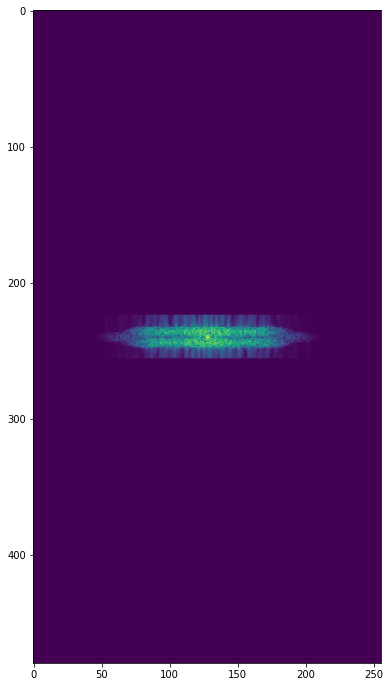

In [110]:
img4xzft = img2xzft.copy()
img4xzft[0:int(7 * r_sim.shape[0] / 15), :] = 0
img4xzft[int(8 * r_sim.shape[0] / 15)::, :] = 0

plt.figure(figsize=(16,12))
plt.imshow(log_p1(np.abs(img4xzft)))

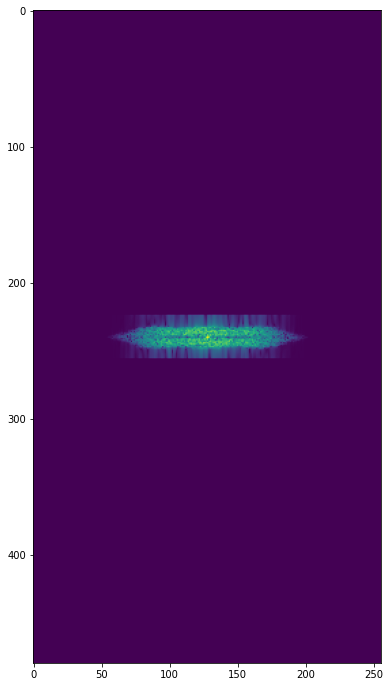

In [111]:
img4yzft = img2yzft.copy()
img4yzft[0:int(7 * r_sim.shape[0] / 15), :] = 0
img4yzft[int(8 * r_sim.shape[0] / 15)::, :] = 0

plt.figure(figsize=(16,12))
plt.imshow(log_p1(np.abs(img4yzft)))

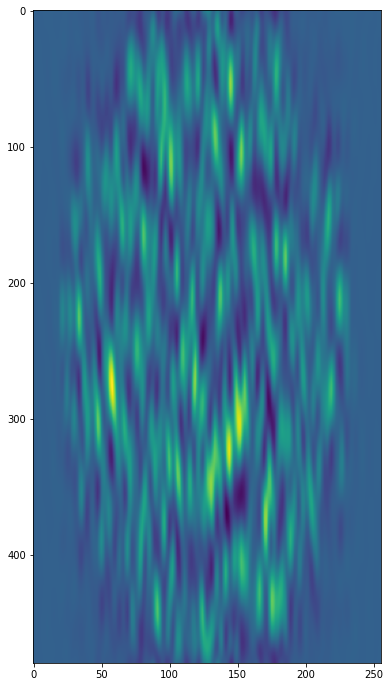

In [112]:
img4xz = np.fft.ifft2(np.fft.ifftshift(img4xzft))
plt.figure(figsize=(16,12))
plt.imshow(img4xz.real)

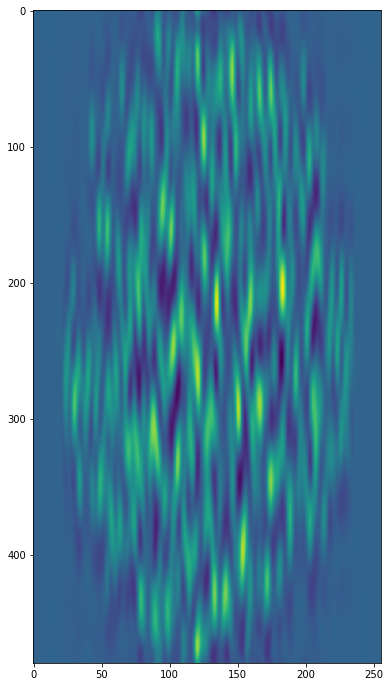

In [113]:
img4yz = np.fft.ifft2(np.fft.ifftshift(img4yzft))
plt.figure(figsize=(16,12))
plt.imshow(img4yz.real)

Note the lack of high frequency artefacts in the z-direction in `img4`.  This image is essentially what is calculated by the **batch process** commands in the `baseSimProcessor` classes.  The top hat filter in frequency space is equivalent to a sinc convolution in real space.  The actual code in the `baseSimProcessor` class, goes one step further and does not even bother with the nulled spatial frequencies in `img4` and by retaining just the zero-order band it generates an optimally sampled output dataset of just 40 slices from the input of 280. 

Or taking just single slices in the xz-direction we get

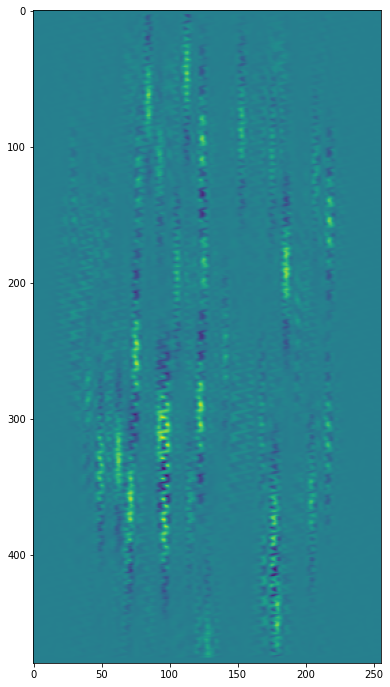

In [114]:
plt.figure(figsize=(16,12))
plt.imshow(r_sim[:, r_sim.shape[1] // 2, :])

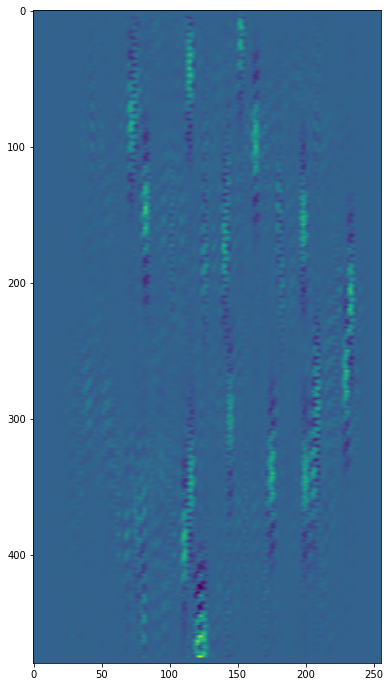

In [115]:
plt.figure(figsize=(16,12))
plt.imshow(r_sim[:, :, r_sim.shape[2] // 2])

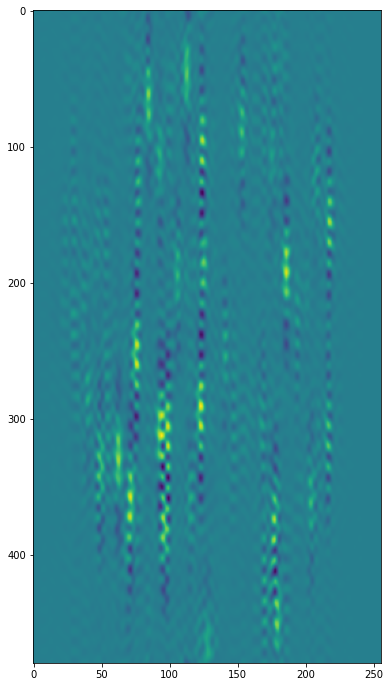

In [116]:
img2ft = np.fft.fft(img2, axis=0)
img2ft[img2.shape[0] // 14:-img2.shape[0] // 14, :, :] = 0
img4 = np.fft.ifft(img2ft, axis=0).real
plt.figure(figsize=(16,12))
plt.imshow(img4[:, img2.shape[1] // 2, :])

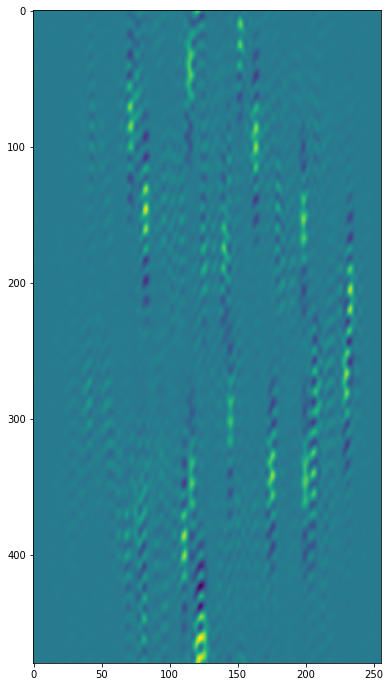

In [117]:
plt.figure(figsize=(16,12))
plt.imshow(img4[:, :, img2.shape[2] // 2])

In [118]:
print(h.eta, h.ampl)

0.9300000000000003 [[0.03585734]
 [0.08375054]
 [0.03798389]
 [0.08347631]
 [0.03827007]
 [0.08400645]]


In [119]:
print(h.eta, h.ampl)

0.9300000000000003 [[0.03585734]
 [0.08375054]
 [0.03798389]
 [0.08347631]
 [0.03827007]
 [0.08400645]]


	torch cuda memory reserved: 0.0 GB
	torch cuda memory reserved after clearing: 0.0 GB


/Users/maan/Documents/Office Projects/Prochip/napari-sim-processor/src/napari_sim_processor/processors/baseSimProcessor.py:1186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


kx = (0.95727277, 1.9022727, -0.47512984, -0.9537662, -0.48214284, -0.9537662)
ky = (-0.0035064945, -9.830896e-10, 0.82928574, 1.6515585, -0.82928574, -1.6515584)
p  = (0.081123546, -0.018442241, 0.07694727, -0.020935073, -0.16242526, 0.016432531)
a  = (0.3152509, 0.60718876, 0.34542644, 0.641686, 0.35027394, 0.62216735)


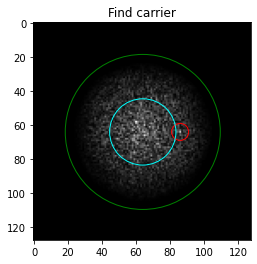

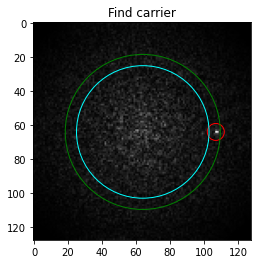

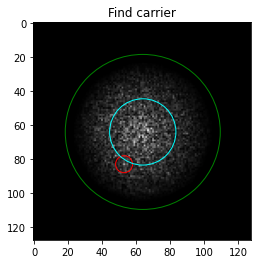

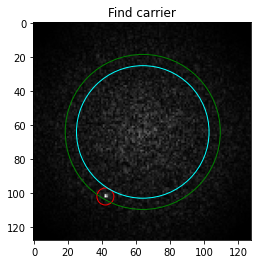

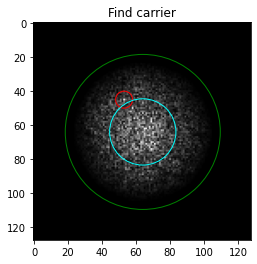

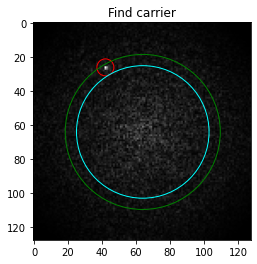

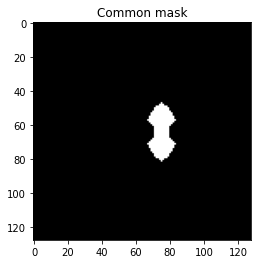

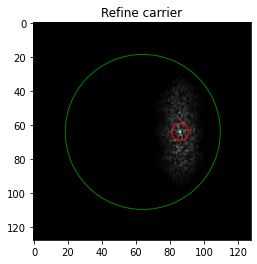

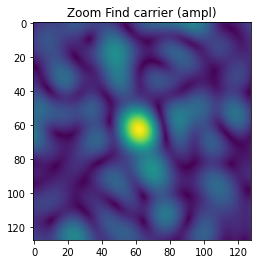

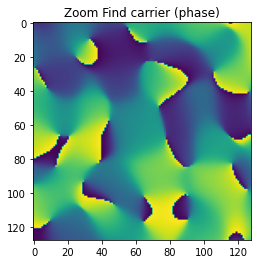

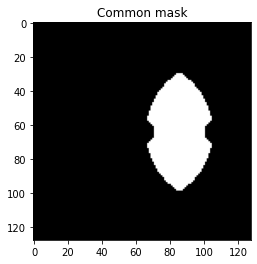

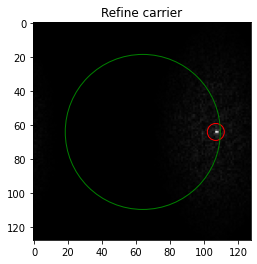

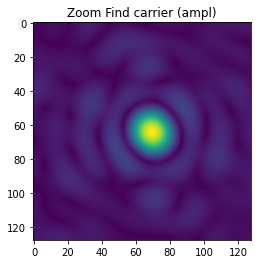

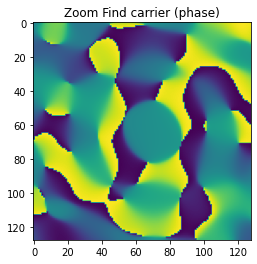

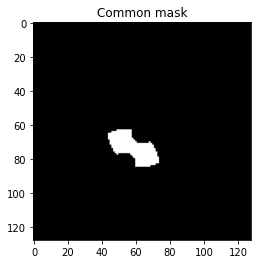

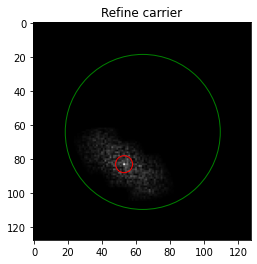

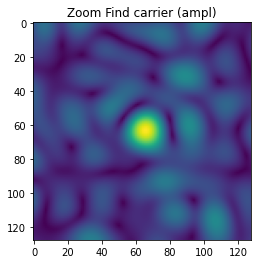

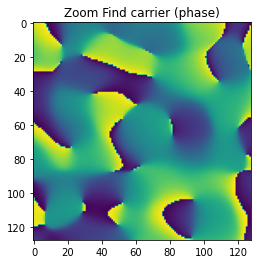

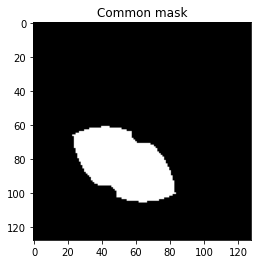

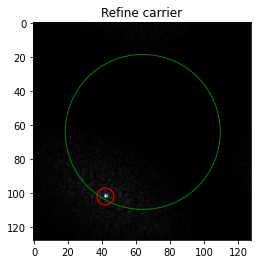

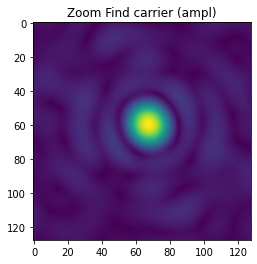

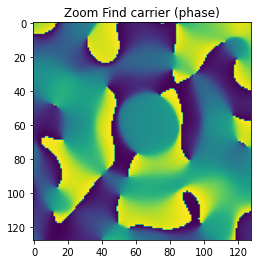

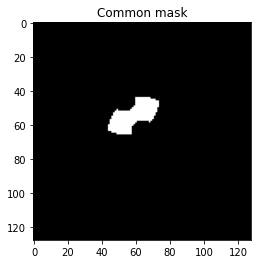

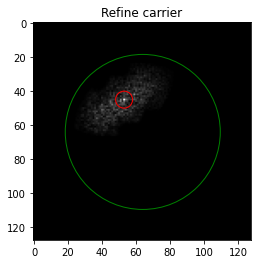

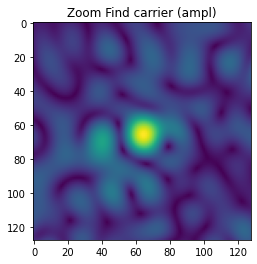

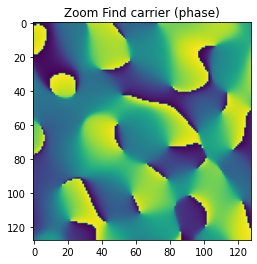

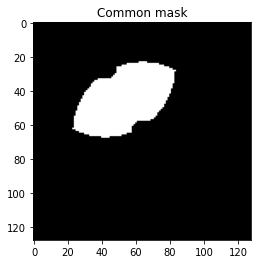

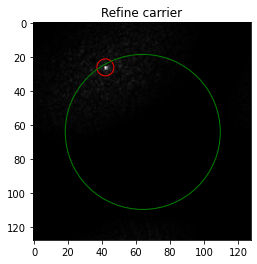

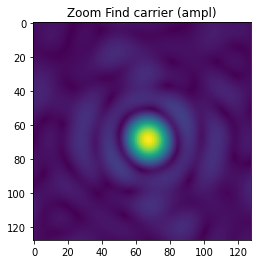

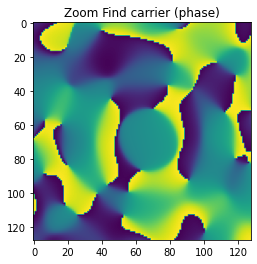

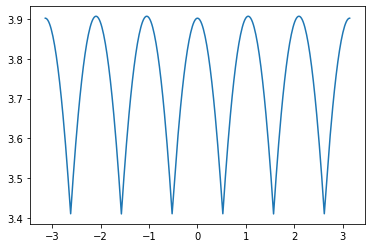

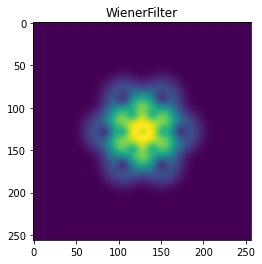

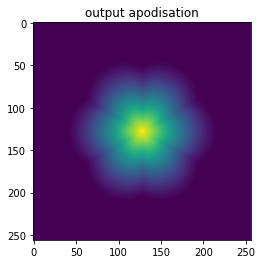

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/superqt/utils/_throttler.py", line 359, in <lambda>
    last_f = lambda: future.set_result(func(*args, **kwargs))  # noqa
  File "/Users/maan/Documents/Office Projects/Prochip/napari-sim-processor/src/napari_sim_processor/_sim_widget.py", line 352, in on_step_change
    if self.step_changed(0,2,3,4):
  File "/Users/maan/Documents/Office Projects/Prochip/napari-sim-processor/src/napari_sim_processor/_sim_widget.py", line 367, in step_changed
    if self._step[step_idx] != current_step[step_idx]:
IndexError: tuple index out of range


Selected image layer: 3d-360z


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/magicgui/widgets/_bases/value_widget.py", line 57, in _on_value_change
    self.changed.emit(value)
  File "psygnal/_signal.py", line 682, in psygnal._signal.SignalInstance.emit
  File "psygnal/_signal.py", line 724, in psygnal._signal.SignalInstance._run_emit_loop
  File "psygnal/_signal.py", line 725, in psygnal._signal.SignalInstance._run_emit_loop
  File "psygnal/_signal.py", line 745, in psygnal._signal.SignalInstance._run_emit_loop
  File "/usr/local/lib/python3.9/site-packages/magicgui/widgets/_function_gui.py", line 201, in _disable_button_and_call
    self.__call__()
  File "/usr/local/lib/python3.9/site-packages/magicgui/widgets/_function_gui.py", line 307, in __call__
    value = self._function(*bound.args, **bound.kwargs)
  File "/Users/maan/Documents/Office Projects/Prochip/napari-sim-processor/src/napari_sim_processor/_sim_widget.py", line 106, in reshape
    raise(ValueError(f'Input image {

Selected image layer: 3d-480z


In [38]:
h.debug=True

In [121]:
print(h.kx, h.ky)

[[ 0.9607793 ]
 [ 1.9022727 ]
 [-0.47863632]
 [-0.9537662 ]
 [-0.47863632]
 [-0.9537662 ]] [[-3.5064945e-03]
 [-9.8308961e-10]
 [ 8.2928574e-01]
 [ 1.6515585e+00]
 [-8.2577926e-01]
 [-1.6515584e+00]]


In [160]:
def _refineCarrier(band0, band1, kx_in, ky_in, eta, debug=False):
    pxc0 = np.int32(np.round(kx_in / h._dkx) + h.Nx // 2)
    pyc0 = np.int32(np.round(ky_in / h._dky) + h.Ny // 2)

    otf_exclude_min_radius = 0.3  # eta / 2
    otf_exclude_max_radius = eta * 2

    m = (h._kr < 2)
    otf = np.fft.fftshift(h._tfm(h._kr, m) + (1 - m) * 0.0001)

    otf_mask = (h._kr > otf_exclude_min_radius) & (h._kr < otf_exclude_max_radius)
    otf_mask_for_band_common_freq = np.fft.fftshift(otf_mask & scipy.ndimage.shift(otf_mask, 
                                            (pyc0 - (h.Ny // 2 ), pxc0 - (h.Nx // 2 )), order=0))

    if debug:
        plt.figure()
        plt.title('Common mask')
        plt.imshow(np.fft.fftshift(otf_mask_for_band_common_freq), cmap=plt.get_cmap('gray'))

    band0_common = np.fft.ifft2(np.fft.fft2(band0) / otf * otf_mask_for_band_common_freq)

    band1_common = np.fft.ifft2(np.fft.fft2(np.conjugate(band1)) / otf * otf_mask_for_band_common_freq)

    band = band0_common * band1_common

    # if debug:
    #     ixf = np.abs(fft.fftshift(fft.fft2(fft.fftshift(band))))
    #     plt.figure()
    #     plt.title('Refine carrier')
    #     plt.imshow(ixf, cmap = plt.get_cmap('gray'))
    #     ax = plt.gca()
    #     circle = plt.Circle((pxc0, pyc0), color = 'red', fill = False)
    #     ax.add_artist(circle)
    #     circle = patches.Ellipse((self.Nx // 2, self.Ny // 2), width=4 / self._dkx, height=4 / self._dky, color='green', fill=False)
    #     ax.add_artist(circle)

    return np.fft.fftshift(np.fft.fft2(band)), pxc0, pyc0
    # mag = (25 * self.Ny / 256, 25 * self.Nx / 256)
    # ixfz, Kx, Ky = self._zoomf(band, (self.Nx, self.Ny), np.single(self._kx[pxc0]), np.single(self._ky[pyc0]), mag , self._dkx * self.Nx)
    # pyc, pxc = self._findPeak(abs(ixfz))

    # if debug:
    #     plt.figure()
    #     plt.title('Zoom Find carrier (ampl)')
    #     plt.imshow(np.abs(ixfz))
    #     plt.figure()
    #     plt.title('Zoom Find carrier (phase)')
    #     plt.imshow(np.angle(ixfz))

    # kx = Kx[pxc]
    # ky = Ky[pyc]

    # xx = np.arange(-self.Nx / 2, self.Nx / 2, dtype=np.double) * self._dx
    # yy = np.arange(-self.Ny / 2, self.Ny / 2, dtype=np.double) * self._dy
    # phase_shift_to_xpeak = exp(-1j * kx * xx * 2 * pi * self.NA / self.wavelength)
    # phase_shift_to_ypeak = exp(-1j * ky * yy * 2 * pi * self.NA / self.wavelength)

    # scaling = 1 / np.sum(band0_common * np.conjugate(band0_common))
    # cross_corr_result = np.sum(band0_common * band1_common * np.outer(
    #                     phase_shift_to_ypeak, phase_shift_to_xpeak)) * scaling

    # ampl = np.abs(cross_corr_result) * 2
    # phase = np.angle(cross_corr_result)
    # return kx, ky, phase, ampl


In [209]:
stack = widget.get_hyperstack()
stack.shape

(3, 5, 32, 128, 128)

In [148]:
stack = widget.get_current_ap_stack()
sa,sp,sy,sx = stack.shape
img = stack.reshape(sa*sp, sy, sx) 


In [133]:
h.kx[0]

array([0.9607793], dtype=float32)

In [161]:
imf, px, py = _refineCarrier(stack[0, :, :, :, :], stack[0, :, :, :, :], h.kx[0], h.ky[0], 0.45)

In [144]:
import scipy

In [151]:
imf.shape

(5, 32, 128, 128)

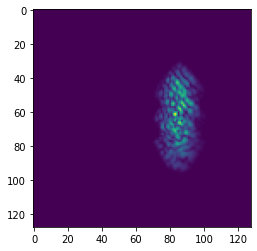

In [166]:
plt.imshow(np.abs(imf[4, 16, :, :]))

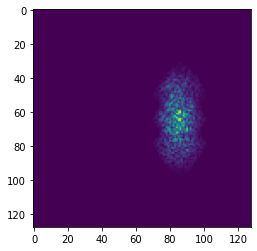

In [187]:
plt.imshow(np.abs(np.sum(imf[:, :, :, :], axis=(0, 1))))

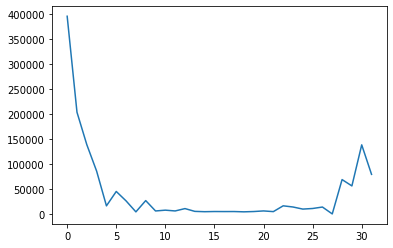

In [190]:
plt.plot(np.abs(np.fft.fft(np.sum(imf[:, :, py, px], axis=0).squeeze())))

In [170]:
py

array([64], dtype=int32)

In [195]:
sum_prepared_comp = np.dot(h._M[:h._nbands + 1, :], imgs.transpose((1, 0, 2)))

ValueError: shapes (7,15) and (128,480,128) not aligned: 15 (dim 1) != 480 (dim 1)

In [210]:
imgs = stack.reshape(15, 32, 128, 128)

In [211]:
sum_prepared_comp = np.zeros((7, 32, 128, 128), dtype=np.complex64)
for i in range(32):
    sum_prepared_comp[:, i, :, :] = np.dot(h._M[:h._nbands + 1, :], imgs[:, i, :, :].transpose((1, 0, 2)))
    

In [204]:
imgs[:, 0, :, :].transpose((1, 0, 2)).shape

(128, 15, 128)

In [199]:
sum_prepared_comp.shape

(7, 32, 128, 128)

In [205]:
h._M[:h._nbands + 1, :].shape

(7, 15)

In [207]:
np.dot(h._M[:h._nbands + 1, :], imgs[:, 0, :, :].transpose((1, 0, 2))).shape

(7, 128, 128)

In [212]:
sum_prepared_comp.shape

(7, 32, 128, 128)

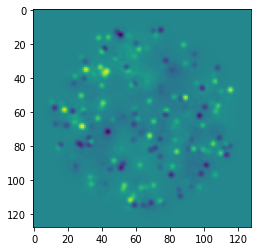

In [222]:
plt.imshow(sum_prepared_comp[4, 16, :, :].imag)